# Data Exploration

This notebook explores the datasets to understand:
- Data distributions
- Missing values
- Relationships between variables
- Historical yield patterns


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up paths
data_dir = Path("../raw_datasets")
output_dir = Path("../models")
output_dir.mkdir(exist_ok=True)

# Load datasets
print("Loading datasets...")
climate_df = pd.read_csv(data_dir / "climate_data.csv")
crop_climate_req = pd.read_csv(data_dir / "crop_climate_requirements.csv")
crop_requirements = pd.read_csv(data_dir / "crop_requirements.csv")
crop_npk_req = pd.read_csv(data_dir / "crop_npk_level_requirements.csv")
historical_perf = pd.read_csv(data_dir / "historical_crop_performance.csv")

print(f"Climate data: {len(climate_df)} records")
print(f"Crop climate requirements: {len(crop_climate_req)} crops")
print(f"Crop requirements: {len(crop_requirements)} crops")
print(f"NPK requirements: {len(crop_npk_req)} crops")
print(f"Historical performance: {len(historical_perf)} records")


Loading datasets...
Climate data: 215556 records
Crop climate requirements: 104 crops
Crop requirements: 104 crops
NPK requirements: 104 crops
Historical performance: 93369 records


In [3]:
# Explore historical performance data
print("Historical Performance Data Overview:")
print(historical_perf.head())
print("\nColumns:", historical_perf.columns.tolist())
print("\nData types:")
print(historical_perf.dtypes)
print("\nMissing values:")
print(historical_perf.isnull().sum())
print("\nBasic statistics:")
print(historical_perf.describe())


Historical Performance Data Overview:
                         Crop          Province  Year  Volume_Production  \
0  Alugbati (Malabar spinach)              Abra  2023               0.75   
1  Alugbati (Malabar spinach)              Abra  2024               0.51   
2  Alugbati (Malabar spinach)  Agusan del Norte  2010              48.65   
3  Alugbati (Malabar spinach)  Agusan del Norte  2011              45.85   
4  Alugbati (Malabar spinach)  Agusan del Norte  2012              42.00   

   Area_Planted_Harvested  
0                    0.92  
1                    1.00  
2                   12.00  
3                   10.00  
4                    9.50  

Columns: ['Crop', 'Province', 'Year', 'Volume_Production', 'Area_Planted_Harvested']

Data types:
Crop                       object
Province                   object
Year                        int64
Volume_Production         float64
Area_Planted_Harvested    float64
dtype: object

Missing values:
Crop                      0
Province 

Valid yield records: 93369

Yield statistics (tons/ha):
count    9.336900e+04
mean     2.051414e+03
std      4.001423e+04
min      8.844515e-05
25%      1.920000e+00
50%      6.005000e+00
75%      3.418548e+01
max      2.459386e+06
Name: yield_per_ha, dtype: float64


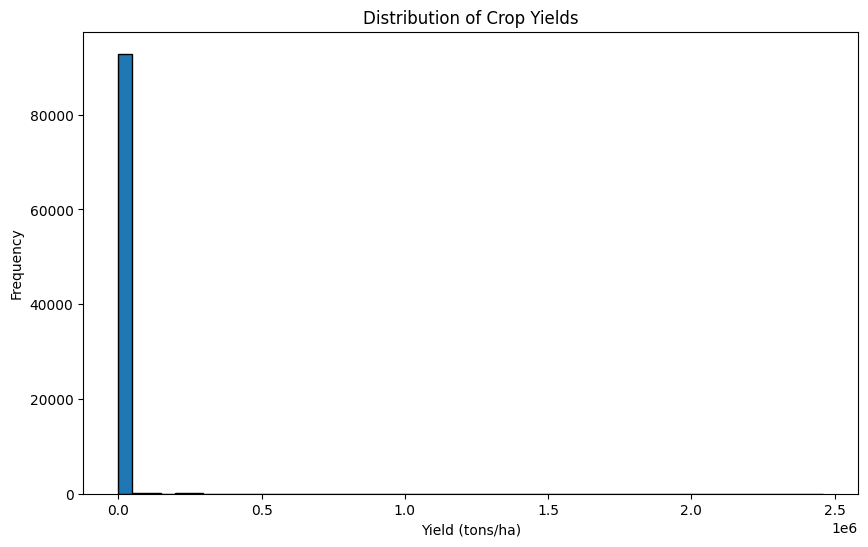

In [4]:
# Calculate yield per hectare
historical_perf['yield_per_ha'] = (
    historical_perf['Volume_Production'] / historical_perf['Area_Planted_Harvested']
)

# Remove invalid yields
historical_perf_clean = historical_perf[
    (historical_perf['yield_per_ha'].notna()) & 
    (historical_perf['yield_per_ha'] != float('inf')) &
    (historical_perf['yield_per_ha'] > 0)
].copy()

print(f"Valid yield records: {len(historical_perf_clean)}")
print(f"\nYield statistics (tons/ha):")
print(historical_perf_clean['yield_per_ha'].describe())

# Plot yield distribution
plt.figure(figsize=(10, 6))
plt.hist(historical_perf_clean['yield_per_ha'], bins=50, edgecolor='black')
plt.xlabel('Yield (tons/ha)')
plt.ylabel('Frequency')
plt.title('Distribution of Crop Yields')
plt.show()


## Deeper Dive into Yield Patterns

Let's explore the yield data more deeply to identify patterns and insights.

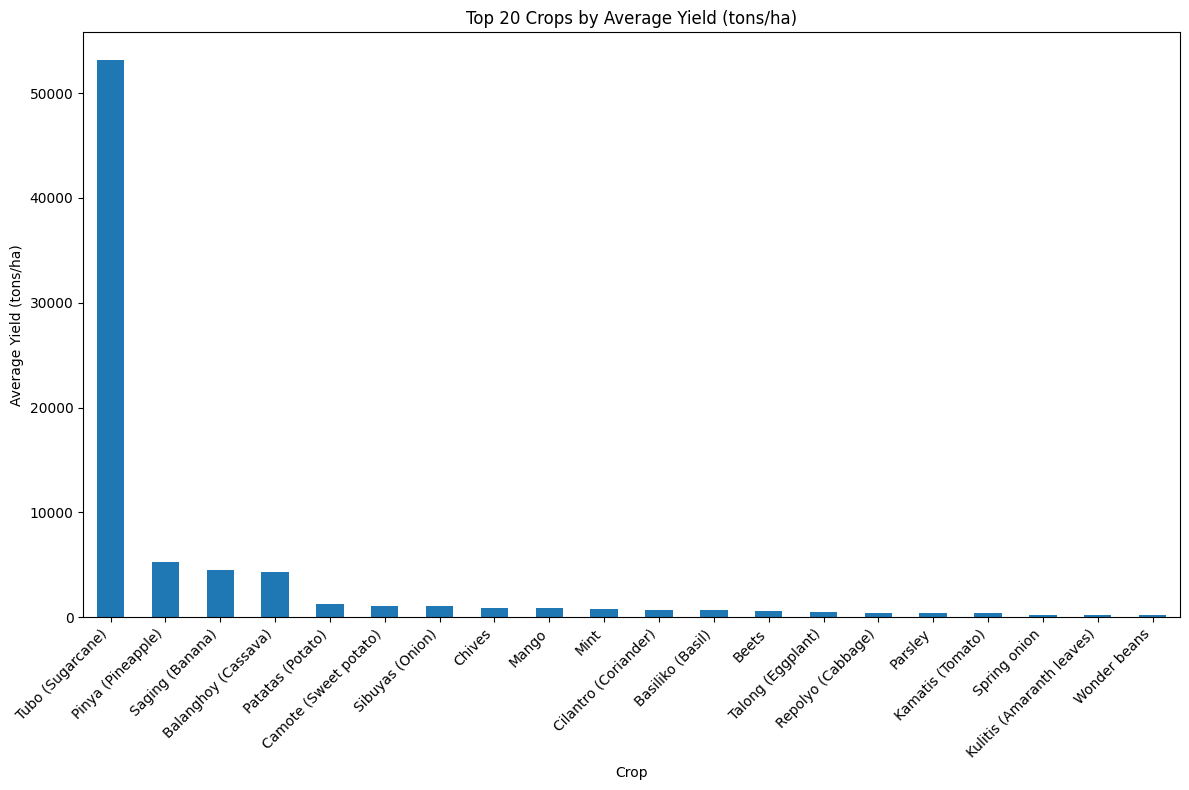

In [5]:
# Top 20 Crops by Average Yield
top_crops = historical_perf_clean.groupby('Crop')['yield_per_ha'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
top_crops.plot(kind='bar')
plt.title('Top 20 Crops by Average Yield (tons/ha)')
plt.xlabel('Crop')
plt.ylabel('Average Yield (tons/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

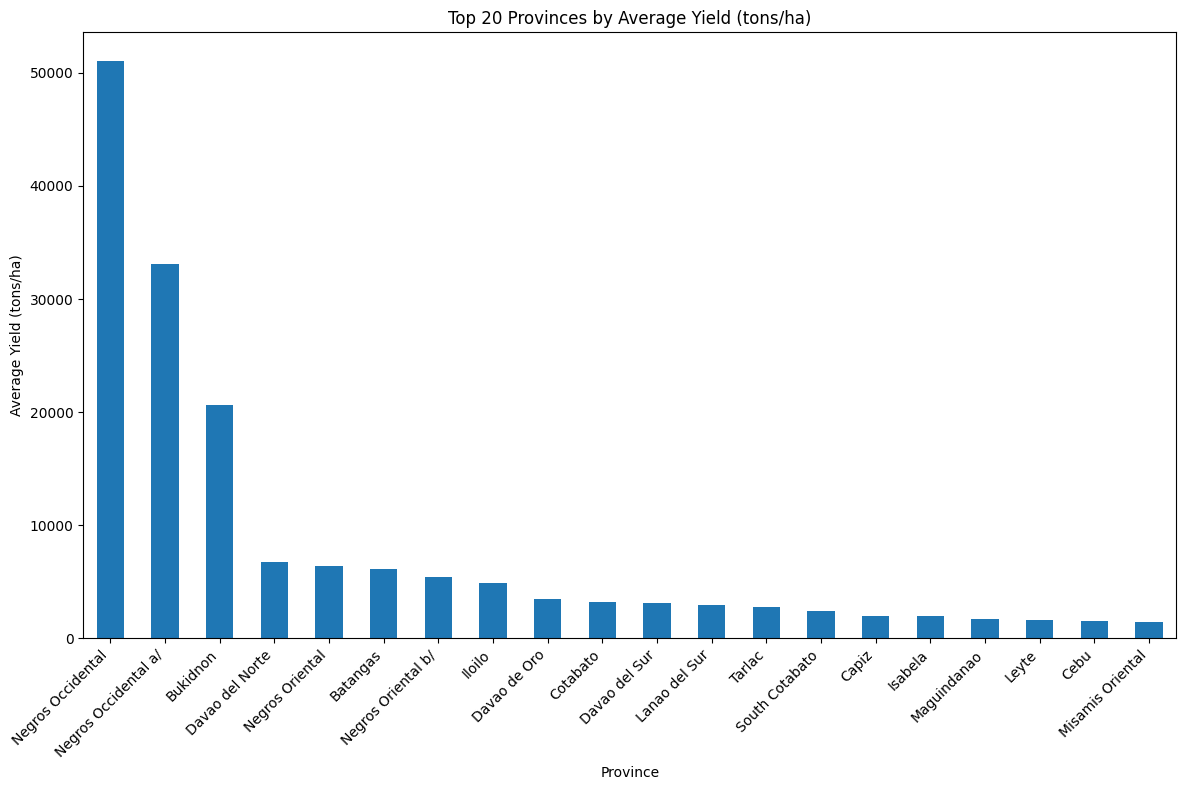

In [6]:
# Top 20 Provinces by Average Yield
top_provinces = historical_perf_clean.groupby('Province')['yield_per_ha'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
top_provinces.plot(kind='bar')
plt.title('Top 20 Provinces by Average Yield (tons/ha)')
plt.xlabel('Province')
plt.ylabel('Average Yield (tons/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

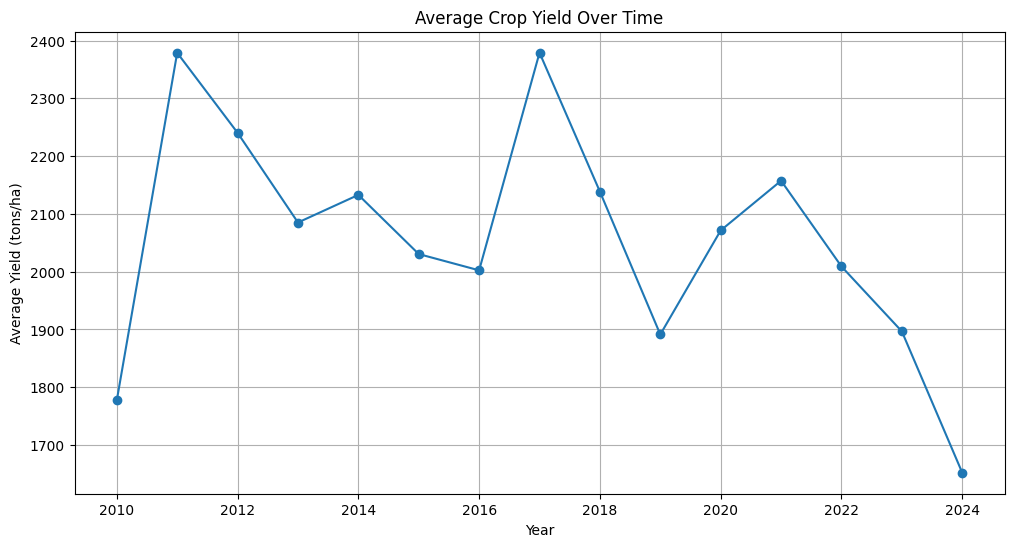

In [7]:
# Yield Trends Over Time
yield_over_time = historical_perf_clean.groupby('Year')['yield_per_ha'].mean()

plt.figure(figsize=(12, 6))
yield_over_time.plot(kind='line', marker='o')
plt.title('Average Crop Yield Over Time')
plt.xlabel('Year')
plt.ylabel('Average Yield (tons/ha)')
plt.grid(True)
plt.show()

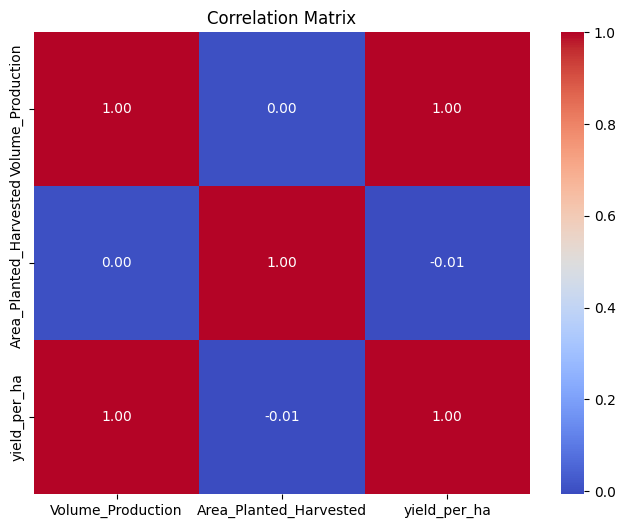

In [8]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = historical_perf_clean[['Volume_Production', 'Area_Planted_Harvested', 'yield_per_ha']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

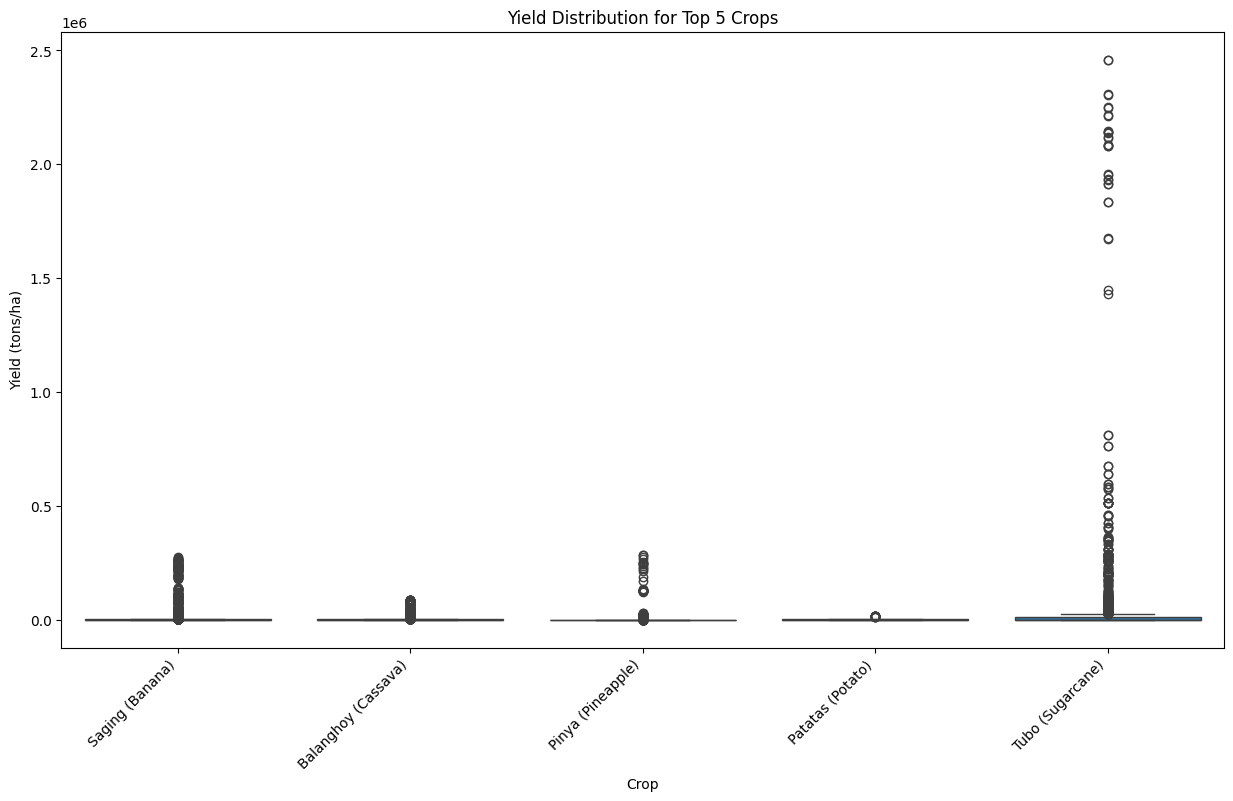

In [9]:
# Box Plots for Top 5 Crops
top_5_crops_list = top_crops.index[:5].tolist()
top_crops_df = historical_perf_clean[historical_perf_clean['Crop'].isin(top_5_crops_list)]

plt.figure(figsize=(15, 8))
sns.boxplot(x='Crop', y='yield_per_ha', data=top_crops_df)
plt.title('Yield Distribution for Top 5 Crops')
plt.xlabel('Crop')
plt.ylabel('Yield (tons/ha)')
plt.xticks(rotation=45, ha='right')
plt.show()

## Additional Data Visualizations

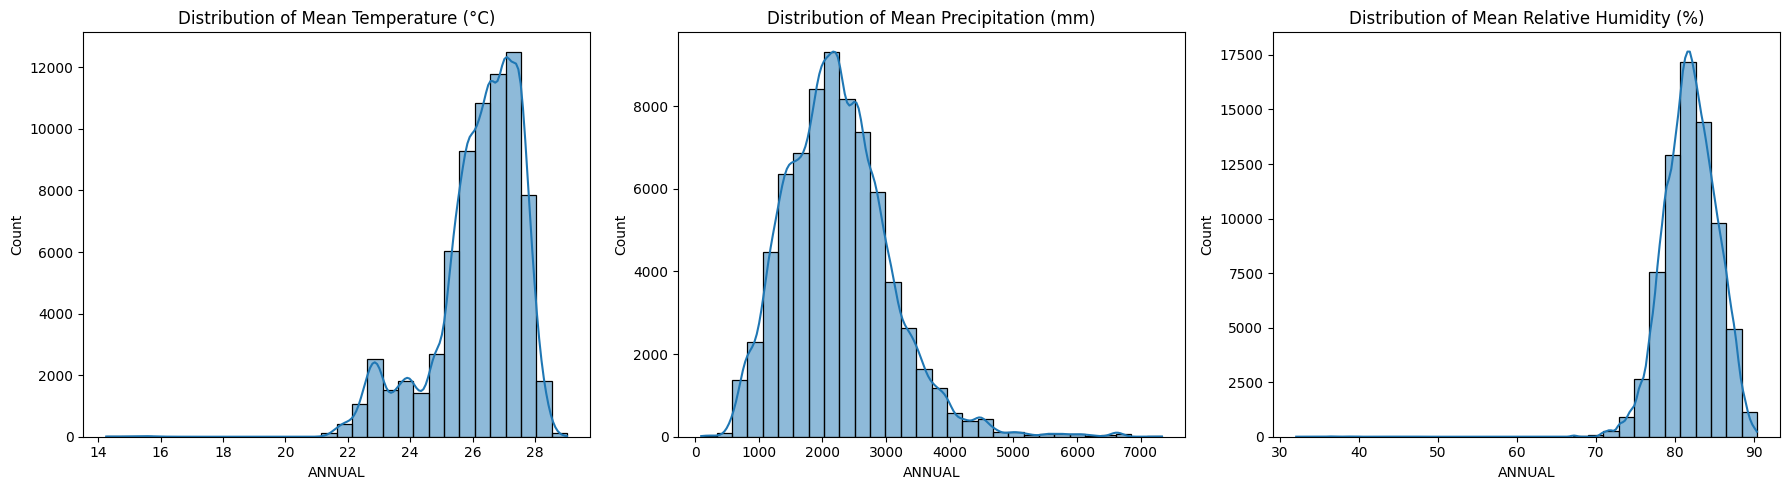

In [12]:
# Distribution of Climate Data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Mean Temperature (annual, PARAMETER == 'T2M')
sns.histplot(
	climate_df.loc[climate_df['PARAMETER'] == 'T2M', 'ANNUAL'],
	bins=30, ax=axes[0], kde=True
)
axes[0].set_title('Distribution of Mean Temperature (°C)')

# Mean Precipitation (annual, PARAMETER == 'PRECTOTCORR_SUM')
sns.histplot(
	climate_df.loc[climate_df['PARAMETER'] == 'PRECTOTCORR_SUM', 'ANNUAL'],
	bins=30, ax=axes[1], kde=True
)
axes[1].set_title('Distribution of Mean Precipitation (mm)')

# Mean Relative Humidity (annual, PARAMETER == 'RH2M')
sns.histplot(
	climate_df.loc[climate_df['PARAMETER'] == 'RH2M', 'ANNUAL'],
	bins=30, ax=axes[2], kde=True
)
axes[2].set_title('Distribution of Mean Relative Humidity (%)')

plt.tight_layout()
plt.show()

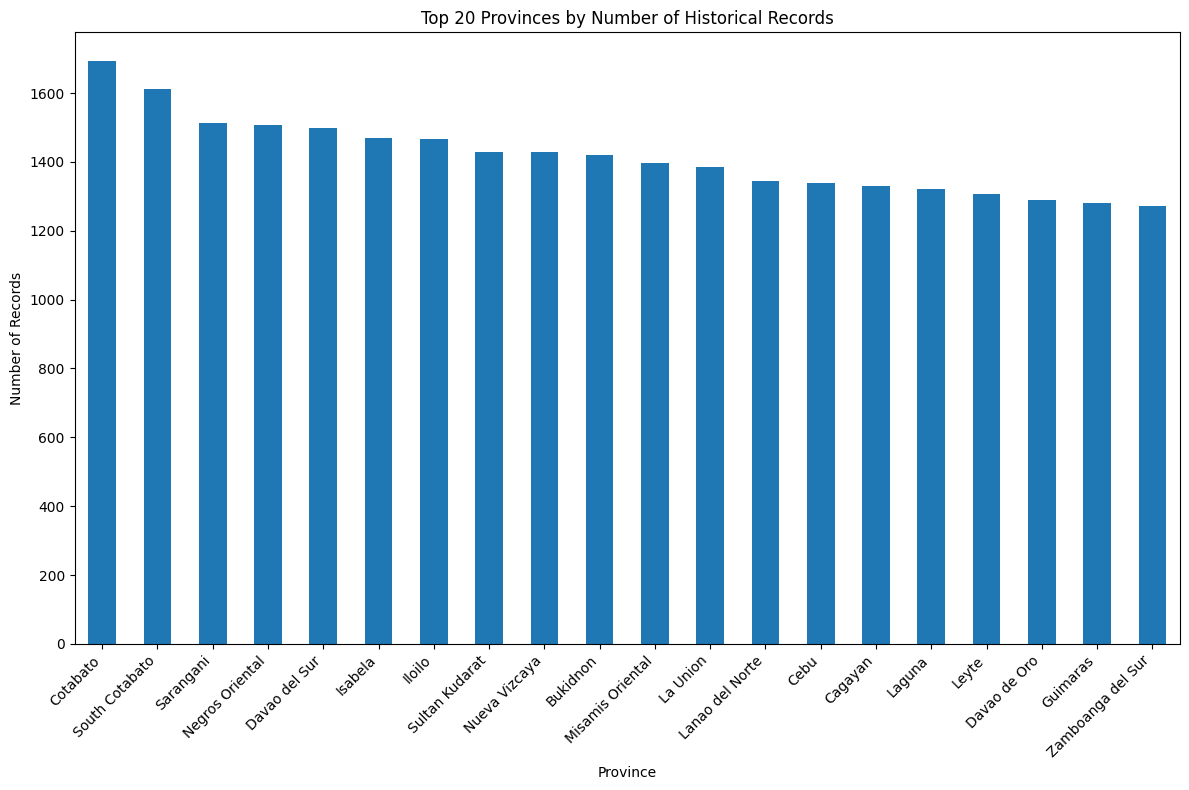

In [13]:
# Number of records per province
plt.figure(figsize=(12, 8))
province_counts = historical_perf_clean['Province'].value_counts().head(20)
province_counts.plot(kind='bar')
plt.title('Top 20 Provinces by Number of Historical Records')
plt.xlabel('Province')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()